<a href="https://colab.research.google.com/github/prakhar-chaurasiya/ml/blob/main/Try_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check for missing values
df = pd.read_csv("bank data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [3]:
# view data
df.iloc[0:5, 1:7]

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc
0,A11,6,A34,A43,1169,A65
1,A12,48,A32,A43,5951,A61
2,A14,12,A34,A46,2096,A61
3,A11,42,A32,A42,7882,A61
4,A11,24,A33,A40,4870,A61


In [4]:
# target variable
df.Default_On_Payment.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [5]:
x_features= list(df.columns)
x_features

['Customer_ID',
 'Status_Checking_Acc',
 'Duration_in_Months',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Credit_Amount',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Inst_Rt_Income',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Current_Address_Yrs',
 'Property',
 'Age',
 'Other_Inst_Plans ',
 'Housing',
 'Num_CC',
 'Job',
 'Dependents',
 'Telephone',
 'Foreign_Worker',
 'Default_On_Payment']

In [6]:
# remove target and customer_id
x_features.remove("Default_On_Payment")
x_features.remove("Customer_ID")

# Visualization

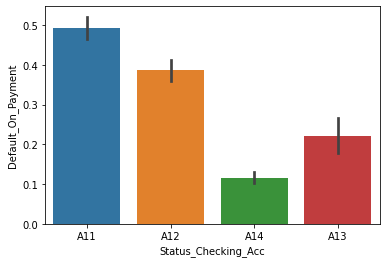

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Status_Checking_Acc', y='Default_On_Payment', data=df)
plt.show()

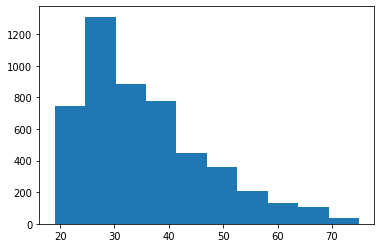

In [8]:
plt.hist(df['Age'])
plt.show()

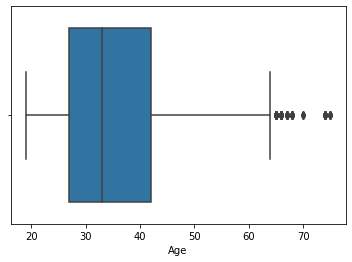

In [9]:
sns.boxplot(x=df['Age'])
plt.show()

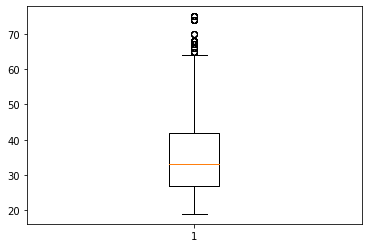

In [10]:
plt.boxplot(df['Age'])
plt.show()

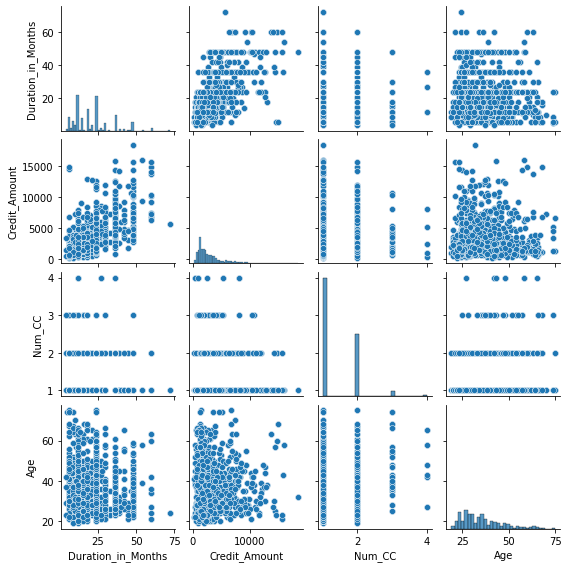

In [11]:
influential_features = ['Duration_in_Months', 'Credit_Amount', 'Num_CC', 'Age']
sns.pairplot(df[influential_features], height=2)
plt.show()

In [12]:
df[influential_features].corr()

,Duration_in_Months,Credit_Amount,Num_CC,Age
Duration_in_Months,1.000000,0.624984,-0.011284,-0.036136
Credit_Amount,0.624984,1.000000,0.020795,0.032716
Num_CC,-0.011284,0.020795,1.000000,0.149254
Age,-0.036136,0.032716,0.149254,1.000000


# Statsmodel

In [13]:
encoded_df = pd.get_dummies(df[x_features], drop_first=True)

In [14]:
x_features = encoded_df.columns
x_features

Index(['Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A32',
       'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64',
       'Savings_Acc_A65', 'Years_At_Present_Employment_A72',
       'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74',
       'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A92',
       'Marital_Status_Gender_A93', 'Marital_Status_Gender_A94',
       'Other_Debtors_Guarantors_A102', 'Other_Debtors_Gu

In [15]:
import statsmodels.api as sm

y = df.Default_On_Payment
x = sm.add_constant(encoded_df)

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [17]:
logit = sm.Logit(y_train, x_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.450245
         Iterations 7


In [18]:
print(logit_model.summary2())

                                 Results: Logit
Model:                  Logit                  Pseudo R-squared:     0.262      
Dependent Variable:     Default_On_Payment     AIC:                  3699.9600  
Date:                   2022-10-01 22:46       BIC:                  4008.3684  
No. Observations:       4000                   Log-Likelihood:       -1801.0    
Df Model:               48                     LL-Null:              -2440.1    
Df Residuals:           3951                   LLR p-value:          3.8272e-236
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.2473   0.5297   0.4668 0.6

In [19]:
y_pred = np.round_(logit_model.predict(x_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       701
           1       0.68      0.57      0.62       299

    accuracy                           0.79      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.78      0.79      0.78      1000



In [20]:
def get_significant_vars(lm):
  var_p_vals_df = pd.DataFrame(lm.pvalues)
  var_p_vals_df['vars'] = var_p_vals_df.index
  var_p_vals_df.columns = ['pvals', 'vars']
  # filter the column names where p-value is less than 0.05
  return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])
  
significant_vars = get_significant_vars(logit_model)
significant_vars

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Age',
 'Num_CC',
 'Status_Checking_Acc_A12',
 'Status_Checking_Acc_A13',
 'Status_Checking_Acc_A14',
 'Credit_History_A32',
 'Credit_History_A33',
 'Credit_History_A34',
 'Purposre_Credit_Taken_A41',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A42',
 'Purposre_Credit_Taken_A43',
 'Purposre_Credit_Taken_A48',
 'Purposre_Credit_Taken_A49',
 'Savings_Acc_A62',
 'Savings_Acc_A64',
 'Savings_Acc_A65',
 'Years_At_Present_Employment_A74',
 'Marital_Status_Gender_A93',
 'Other_Debtors_Guarantors_A102',
 'Other_Debtors_Guarantors_A103',
 'Property_A122',
 'Property_A123',
 'Property_A124',
 'Other_Inst_Plans _A143',
 'Housing_A152',
 'Housing_A153',
 'Telephone_A192',
 'Foreign_Worker_A202']

In [21]:
final_logit = sm.Logit(y_train, sm.add_constant(x_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.452202
         Iterations 7


In [22]:
print(final_logit.summary2())

                                 Results: Logit
Model:                  Logit                  Pseudo R-squared:     0.259      
Dependent Variable:     Default_On_Payment     AIC:                  3683.6192  
Date:                   2022-10-01 22:46       BIC:                  3891.3229  
No. Observations:       4000                   Log-Likelihood:       -1808.8    
Df Model:               32                     LL-Null:              -2440.1    
Df Residuals:           3967                   LLR p-value:          5.6109e-245
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.7150   0.3029   2.3609 0.0

In [23]:
x_test = sm.add_constant(x_test[significant_vars])
y_pred = np.round_(final_logit.predict(x_test).values)
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       701
           1       0.67      0.56      0.61       299

    accuracy                           0.79      1000
   macro avg       0.75      0.72      0.73      1000
weighted avg       0.78      0.79      0.78      1000



# Other Models

In [24]:
x = encoded_df[significant_vars].values
# x = encoded_df.values
y = df.Default_On_Payment.values

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [26]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x_train = MM.fit_transform(x_train)
x_test = MM.fit_transform(x_test)

In [27]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [28]:
LR = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       701
           1       0.68      0.56      0.61       299

    accuracy                           0.79      1000
   macro avg       0.75      0.72      0.73      1000
weighted avg       0.78      0.79      0.78      1000



In [29]:
DT = DecisionTreeClassifier(max_depth=10, random_state=0).fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       701
           1       0.83      0.82      0.82       299

    accuracy                           0.90      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.89      0.90      0.89      1000



In [30]:
RF = RandomForestClassifier(max_depth=10, random_state=0).fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       701
           1       1.00      0.81      0.90       299

    accuracy                           0.94      1000
   macro avg       0.96      0.91      0.93      1000
weighted avg       0.95      0.94      0.94      1000



In [31]:
SVM = SVC().fit(x_train, y_train)
y_pred = SVM.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       701
           1       0.90      0.75      0.82       299

    accuracy                           0.90      1000
   macro avg       0.90      0.86      0.87      1000
weighted avg       0.90      0.90      0.90      1000



In [32]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       701
           1       0.93      0.88      0.90       299

    accuracy                           0.94      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.94      0.94      0.94      1000



In [33]:
NAIVE = GaussianNB().fit(x_train, y_train)
y_pred = NAIVE.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       701
           1       0.52      0.72      0.60       299

    accuracy                           0.71      1000
   macro avg       0.69      0.72      0.69      1000
weighted avg       0.75      0.71      0.73      1000



In [34]:
LDA = LinearDiscriminantAnalysis().fit(x_train, y_train)
y_pred = LDA.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       701
           1       0.68      0.56      0.62       299

    accuracy                           0.79      1000
   macro avg       0.75      0.72      0.74      1000
weighted avg       0.78      0.79      0.78      1000



In [35]:
from xgboost import XGBClassifier
XGB = XGBClassifier().fit(x_train, y_train)
y_pred = XGB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       701
           1       0.81      0.64      0.71       299

    accuracy                           0.85      1000
   macro avg       0.83      0.79      0.80      1000
weighted avg       0.84      0.85      0.84      1000



In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [37]:
drop = 0.3
model = Sequential()
model.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [38]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
125/125 [==============================] - 3s 7ms/step - loss: 0.5663 - accuracy: 0.7007
Epoch 2/15
125/125 [==============================] - 1s 7ms/step - loss: 0.4960 - accuracy: 0.7427
Epoch 3/15
125/125 [==============================] - 1s 8ms/step - loss: 0.4569 - accuracy: 0.7785
Epoch 4/15
125/125 [==============================] - 1s 8ms/step - loss: 0.4130 - accuracy: 0.8135
Epoch 5/15
125/125 [==============================] - 1s 10ms/step - loss: 0.3738 - accuracy: 0.8345
Epoch 6/15
125/125 [==============================] - 1s 7ms/step - loss: 0.3339 - accuracy: 0.8522
Epoch 7/15
125/125 [==============================] - 1s 6ms/step - loss: 0.3003 - accuracy: 0.8655
Epoch 8/15
125/125 [==============================] - 1s 8ms/step - loss: 0.2918 - accuracy: 0.8742
Epoch 9/15
125/125 [==============================] - 1s 7ms/step - loss: 0.2562 - accuracy: 0.8903
Epoch 10/15
125/125 [==============================] - 1s 6ms/step - loss: 0.2365 - accuracy: 0.902

In [39]:
y_pred = np.ravel(np.round_(model.predict(x_test)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       701
           1       0.99      0.94      0.96       299

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



# Class Balancing

In [40]:
counts = np.bincount(y_train)
print(
    "Number of loan default samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

class_weight = {0: weight_for_0, 1: weight_for_1}

Number of loan default samples in training data: 1196 (29.90% of total)


In [41]:
drop = 0.3
model = Sequential()
model.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [42]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, class_weight=class_weight)

Epoch 1/15
125/125 [==============================] - 2s 6ms/step - loss: 3.2850e-04 - accuracy: 0.6250
Epoch 2/15
125/125 [==============================] - 0s 4ms/step - loss: 2.8760e-04 - accuracy: 0.6775
Epoch 3/15
125/125 [==============================] - 0s 3ms/step - loss: 2.6795e-04 - accuracy: 0.7182
Epoch 4/15
125/125 [==============================] - 0s 4ms/step - loss: 2.4752e-04 - accuracy: 0.7527
Epoch 5/15
125/125 [==============================] - 0s 4ms/step - loss: 2.2204e-04 - accuracy: 0.7775
Epoch 6/15
125/125 [==============================] - 0s 4ms/step - loss: 2.0014e-04 - accuracy: 0.7960
Epoch 7/15
125/125 [==============================] - 0s 4ms/step - loss: 1.8555e-04 - accuracy: 0.8245
Epoch 8/15
125/125 [==============================] - 0s 4ms/step - loss: 1.6895e-04 - accuracy: 0.8388
Epoch 9/15
125/125 [==============================] - 0s 3ms/step - loss: 1.5556e-04 - accuracy: 0.8525
Epoch 10/15
125/125 [==============================] - 0s 4ms/st

In [43]:
y_pred = np.ravel(np.round_(model.predict(x_test)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       701
           1       0.86      0.97      0.91       299

    accuracy                           0.94      1000
   macro avg       0.92      0.95      0.94      1000
weighted avg       0.95      0.94      0.95      1000

